In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

In [31]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Data Loading

In [32]:
# read data csv file
file_path = '/home/pravin/Documents/Datascience/QXI_DataScience_Pravin/Unit_06_Linear_Regression/FuelConsumption.csv'

In [33]:
df = pd.read_csv(file_path,delimiter=',')

In [34]:
# check data rows
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [35]:
# check data size
df.shape

(1067, 13)

In [36]:
# check data columns
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#### EDA

In [37]:
# check concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [38]:
# check null values of each column
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

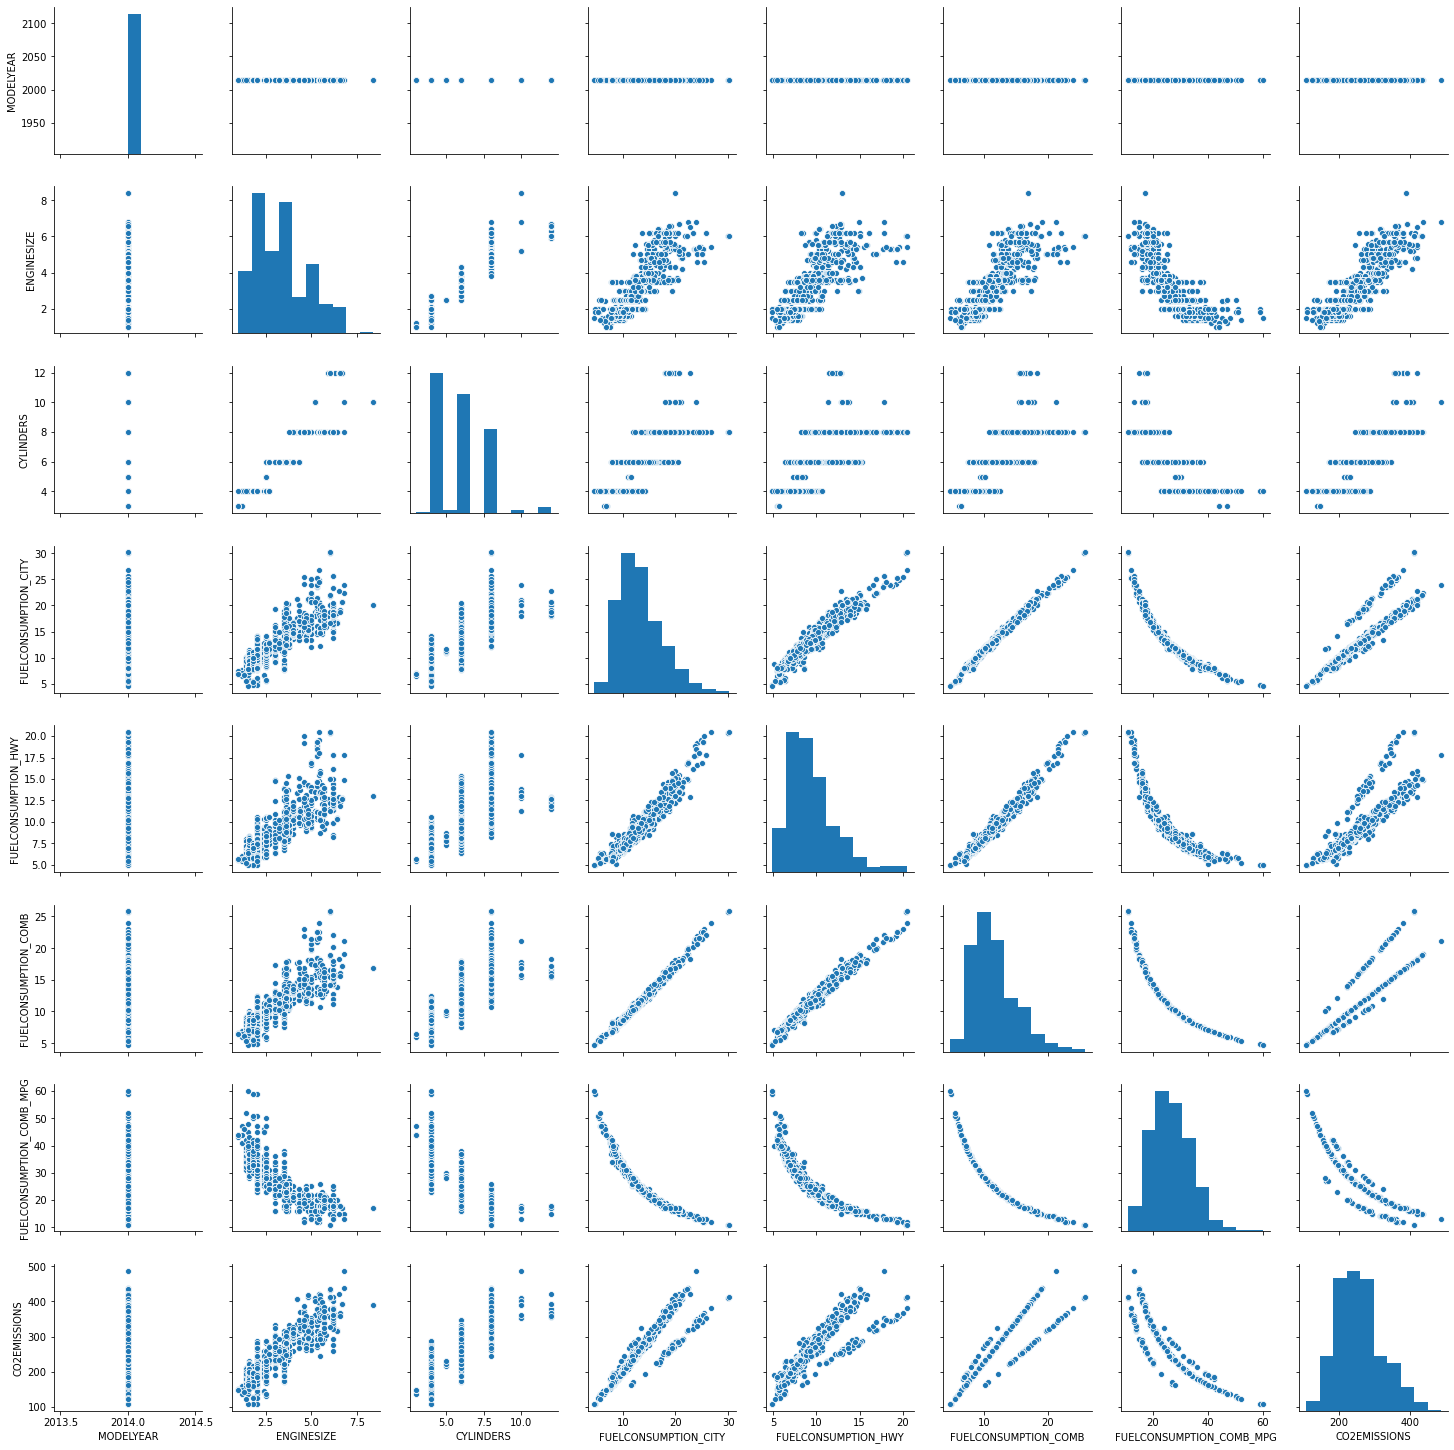

In [21]:
sns.pairplot(df)

In [23]:
#Displays all details of descriptive analysis on data

import pandas_profiling
report = pandas_profiling.ProfileReport(df)
display(report)

In [24]:
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

#### Seprating the Feature(X/input/indpendent) and Target(Y/Output/Dependending)

In [39]:
Feature  = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
                 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]

In [76]:
Feature.head()

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0         2.0          4                   9.9                  6.7   
1         2.4          4                  11.2                  7.7   
2         1.5          4                   6.0                  5.8   
3         3.5          6                  12.7                  9.1   
4         3.5          6                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
0                   8.5                        33  
1                   9.6                        29  
2                   5.9                        48  
3                  11.1                        25  
4                  10.6                        27

In [79]:
Traget = df['CO2EMISSIONS']

In [80]:
Traget.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

#### Model Selection for Train and Testing porcess Spliting the Data in to 75% For Train and 20% Testing

In [81]:
### Train The Model
from sklearn.model_selection import train_test_split

In [82]:
# Randomly Select the Data
X_train,X_Test,Y_Train, Y_Test = train_test_split(Feature,Traget,test_size = 0.2, random_state = 0)   

In [83]:
X_train.shape

(853, 6)

In [85]:
X_Test.shape

(214, 6)

In [86]:
Y_Train.shape

(853,)

In [87]:
Y_Test.shape

(214,)

In [88]:
X_train.head()

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
270          3.6          6                  14.6                 10.2   
1006         4.6          8                  16.9                 12.8   
728          3.5          6                  12.1                  8.7   
992          2.5          4                  10.6                  8.2   
702          1.5          4                   8.0                  6.7   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
270                   12.6                        22  
1006                  15.1                        19  
728                   10.6                        27  
992                    9.5                        30  
702                    7.4                        38

In [89]:
Y_Train.head()

270     290
1006    347
728     244
992     218
702     170
Name: CO2EMISSIONS, dtype: int64

#### Apply the linear Regression Model

In [90]:
# Importing the model
from sklearn.linear_model import LinearRegression

In [91]:
# Callin the Model From Scikit-Learn
Model = LinearRegression(normalize=True)

In [92]:
# Fiting thr Data
Model.fit(X_train,Y_Train)

LinearRegression(normalize=True)

In [93]:
# Slopes of Stright Line
Model.coef_

array([  9.39396011,   7.90721447, -12.28348962,  -4.21551775,
        19.89898183,  -3.89937261])

In [100]:
#intercept Point In Y axis
Model.intercept_

255.28909162494364

In [101]:
Model.predict([[2.0,4,9.9,6.7,8.5,33]])

array([196.317403])

In [102]:
df.head(1)

MODELYEAR   MAKE MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS TRANSMISSION  \
0       2014  ACURA   ILX      COMPACT         2.0          4          AS5   

  FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
0        Z                   9.9                  6.7                   8.5   

   FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                        33           196

In [103]:
import statsmodels.api as sm

In [104]:
result = sm.OLS(Y_Train,X_train).fit()

In [105]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           CO2EMISSIONS   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.620e+04
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:41:33   Log-Likelihood:                         -3943.8
No. Observations:                 853   AIC:                                      7900.
Df Residuals:                     847   BIC:                                      7928.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ENGINESIZE                   9.0759      1.872      4.847      0.000       5.401      12.751
CYLINDERS                   10.5589      1.362      7.752      0.000       7.885      13.232
FUELCONSUMPTION_CITY       -10.5901     16.044     -0.660      0.509     -42.081      20.901
FUELCONSUMPTION_HWY         -8.2606     13.260     -0.623      0.533     -34.288      17.766
FUELCONSUMPTION_COMB        30.5148     29.203      1.045      0.296     -26.804      87.834
FUELCONSUMPTION_COMB_MPG     1.1560      0.080     14.494      0.000       0.999       1.313
==============================================================================
Omnibus:                       52.205   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.317
Skew:                          -0.560   Prob(JB):                     6.55e-15
Kurtosis:                       3.763   Cond. No.                     1.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### New_predication

In [106]:
New_prediction = Model.predict(X_Test)

#### Comparing the Actual Data and New predication and find the Error

In [107]:
pd.DataFrame({"Actual_Data":Y_Test,
             "New_Predication":New_prediction,
             "Error":Y_Test-New_prediction}) 

Actual_Data  New_Predication      Error
766           356       340.273588  15.726412
204           209       209.913717  -0.913717
629           230       224.250260   5.749740
897           212       227.657982 -15.657982
711           168       177.150612  -9.150612
...           ...              ...        ...
822           198       199.463037  -1.463037
1029          221       216.040111   4.959889
798           191       190.786088   0.213912
803           184       184.638375  -0.638375
251           184       182.759582   1.240418

[214 rows x 3 columns]

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [109]:
# Total Mean Error
mean_squared_error(Y_Test,New_prediction) 

439.39247769227813

In [110]:
mean_absolute_error(Y_Test,New_prediction)

13.842866753006428

In [112]:
# check accuracy of score
Train_Score = Model.score(X_train,Y_Train)

In [113]:
print("Train Score of a Model is : {}".format(Train_Score))

Train Score of a Model is : 0.8869838224229547


In [114]:
Test_Score = Model.score(X_Test,Y_Test)
print("Test Score of a Model is : {}".format(Test_Score))

Test Score of a Model is : 0.8959151986025741


#### Cross Validating the Model

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
cv = cross_val_score(Model, X_train,Y_Train,cv = 20)
cv

array([0.88027924, 0.78653835, 0.85589847, 0.89912222, 0.87865706,
       0.91180047, 0.81292907, 0.8803491 , 0.87475743, 0.94229599,
       0.93429624, 0.88556335, 0.86460823, 0.92069458, 0.88170929,
       0.85156224, 0.90456234, 0.83622782, 0.93283767, 0.89895938])

In [117]:
np.mean(cv)

0.8816824264379137

In [118]:
np.max(cv)

0.9422959886678727

In [119]:
np.min(cv)

0.7865383549597388

Text(0, 0.5, 'Predictions')

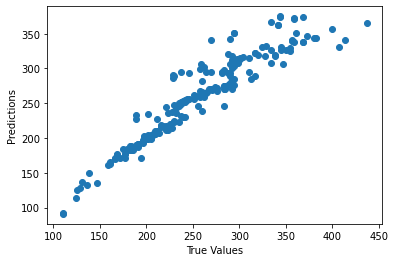

In [122]:
## The line / model
plt.scatter(Y_Test, New_prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")